In [5]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import emcee
import tqdm
import corner
# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Get the data

In [6]:
# Load the saved array - gives Boost(i = sample point, z, k)
Bk_arr = np.load('Boost.npy')
print(Bk_arr.shape)

(50, 51, 768)


In [7]:
# extract data from text file - gives z and k arrays
txt_arr = np.loadtxt("z_k.txt")

z_arr = np.array(txt_arr.T[0][np.isfinite(txt_arr.T[0])])
k_arr = np.array(txt_arr.T[1])

print(z_arr.shape)
print(k_arr.shape)

(51,)
(768,)


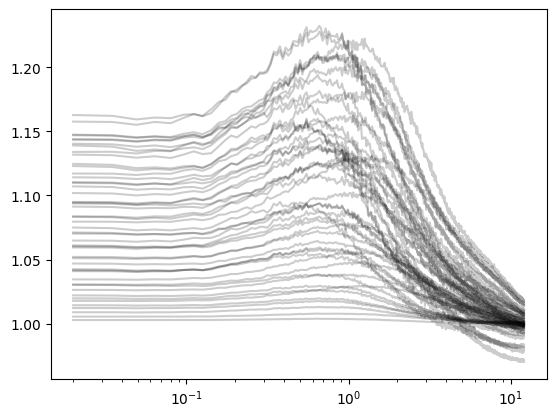

In [15]:
# Plot data

z_index = 12

plt.figure(32)
for sim_index in range(50):
    plt.plot(k_arr, Bk_arr[sim_index, z_index, :], 'k', alpha=0.2)
    
    
plt.xscale('log')
plt.show()
     


In [9]:
# Get the parameters

txt = "cosmo_newdesign"
hcube = np.loadtxt(txt).T
f_phi = hcube[4]

wm = hcube[0]
theta_1 = np.array([wm,f_phi])

"""
n_s = np.delete(hcube[1], exclude, axis=0)
A_s = np.delete(hcube[2], exclude, axis=0)
"""
""" h = 0.67
    wb = 0.0223
    wr = 4.28e-5
"""


' h = 0.67\n    wb = 0.0223\n    wr = 4.28e-5\n'

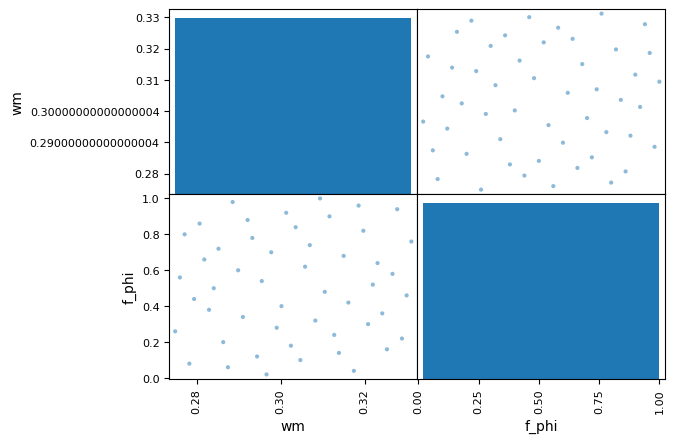

In [10]:
df_theta = pd.DataFrame(theta_1.T, columns=['wm','f_phi'])
pd.plotting.scatter_matrix(df_theta)
plt.show()


## standardization transformation

(2, 50)
(50, 768)


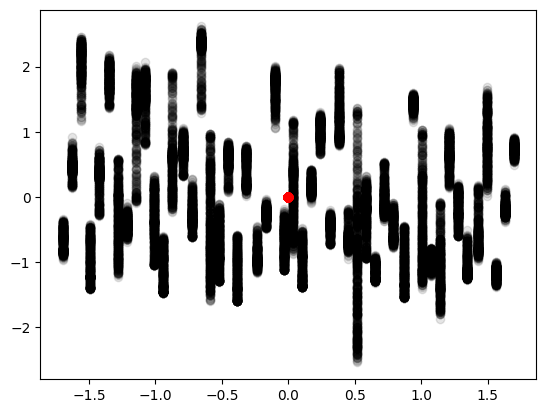

In [11]:
 # If the mean and std were computed for each cosmo model
theta = np.zeros((len(theta_1), len(theta_1[0])))

theta[0] = (theta_1[0] - np.mean(theta_1[0]))/np.std(theta_1[0])
theta[1] = (theta_1[1] - np.mean(theta_1[1]))/np.std(theta_1[1])

print(theta.shape)

# function of k, for now only z = 0
chi = (Bk_arr[:, 0, :] - np.mean(Bk_arr[:, 0, :], axis=0))/np.std(Bk_arr[:, 0, :], axis=0)

print(chi.shape)

# this plot shows the mean is at zero for all k
for i in range(len(k_arr)):
    plt.scatter(theta[0], chi.T[i], color="k", alpha = 0.1)
    plt.scatter(np.mean(theta[0]), np.mean(chi.T[i]), color = "r")

plt.show()

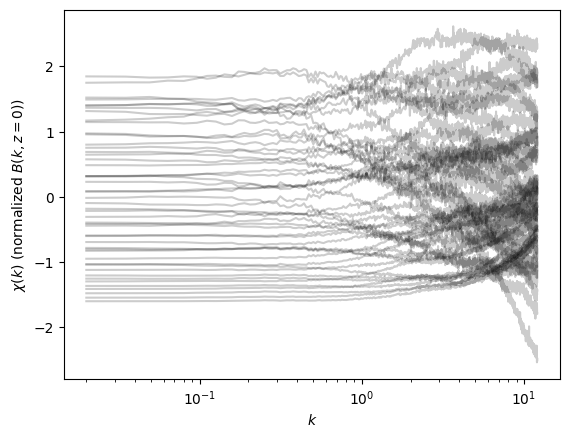

In [18]:
plt.figure(32)
for i in range(50):
    plt.plot(k_arr, chi[i], 'k', alpha=0.2)
    
plt.xscale('log')
plt.xlabel(r"$k$")
plt.ylabel(r"$\chi(k)$ (normalized $B(k, z=0)$)")

plt.show()

## Apply PCA

In [19]:
#TEST: Perform PCA with numpy.linalg.svd

Usvd, s, vh = np.linalg.svd(chi.T, full_matrices=True)

Usvd = Usvd.T

print("eigenvalues = ", s)

print("shape U = ", Usvd.shape)
print("shape sigma = ", s.shape)
print("shape V_transpose = ", vh.shape)

eigenvalues =  [1.86545243e+02 5.79263491e+01 9.14133242e+00 7.26958235e+00
 4.41688248e+00 3.56717423e+00 2.75949961e+00 2.53255766e+00
 2.18425349e+00 2.04180878e+00 1.98564620e+00 1.83027231e+00
 1.73082587e+00 1.69583718e+00 1.60438348e+00 1.56370275e+00
 1.53170626e+00 1.50487294e+00 1.46032865e+00 1.40490833e+00
 1.37533747e+00 1.31576504e+00 1.30104449e+00 1.27455742e+00
 1.25062263e+00 1.18906715e+00 1.18123835e+00 1.14272948e+00
 1.13420578e+00 1.09011731e+00 1.05775004e+00 1.01389633e+00
 9.87266808e-01 9.84848469e-01 9.39840968e-01 9.19620803e-01
 8.90082717e-01 8.81591842e-01 8.64666258e-01 8.27750997e-01
 7.89932480e-01 7.34019338e-01 6.73552407e-01 6.15197613e-01
 5.83065021e-01 5.28252883e-01 4.76119192e-01 3.16485874e-01
 1.98165334e-01 2.26092463e-12]
shape U =  (768, 768)
shape sigma =  (50,)
shape V_transpose =  (50, 50)


In [20]:
#TEST: Perform PCA with sklearn (Choose n_components to keep)
pca = PCA()

# Apply sklearn PCA method
sklearn_PCA = pca.fit(chi)

# Find vectors in direction of PCs (normalized ,positive)
PCAs_vects_sklearn = sklearn_PCA.components_
print("PCA eigenvector array size = ", PCAs_vects_sklearn.shape)

# Find eigenvalues for each PC
PCAs_eigenvals_sklearn = sklearn_PCA.singular_values_

print("eigenvalues = ", PCAs_eigenvals_sklearn)
#find PC vectors with eigenvalues as norm

Usklearn = np.matmul(np.diag(PCAs_eigenvals_sklearn), np.matrix(PCAs_vects_sklearn))

print("PCA norm eigenvector array size = ",Usklearn.shape)

PCA eigenvector array size =  (50, 768)
eigenvalues =  [1.86545243e+02 5.79263491e+01 9.14133242e+00 7.26958235e+00
 4.41688248e+00 3.56717423e+00 2.75949961e+00 2.53255766e+00
 2.18425349e+00 2.04180878e+00 1.98564620e+00 1.83027231e+00
 1.73082587e+00 1.69583718e+00 1.60438348e+00 1.56370275e+00
 1.53170626e+00 1.50487294e+00 1.46032865e+00 1.40490833e+00
 1.37533747e+00 1.31576504e+00 1.30104449e+00 1.27455742e+00
 1.25062263e+00 1.18906715e+00 1.18123835e+00 1.14272948e+00
 1.13420578e+00 1.09011731e+00 1.05775004e+00 1.01389633e+00
 9.87266808e-01 9.84848469e-01 9.39840968e-01 9.19620803e-01
 8.90082717e-01 8.81591842e-01 8.64666258e-01 8.27750997e-01
 7.89932480e-01 7.34019338e-01 6.73552407e-01 6.15197613e-01
 5.83065021e-01 5.28252883e-01 4.76119192e-01 3.16485874e-01
 1.98165334e-01 8.28427297e-14]
PCA norm eigenvector array size =  (50, 768)


Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

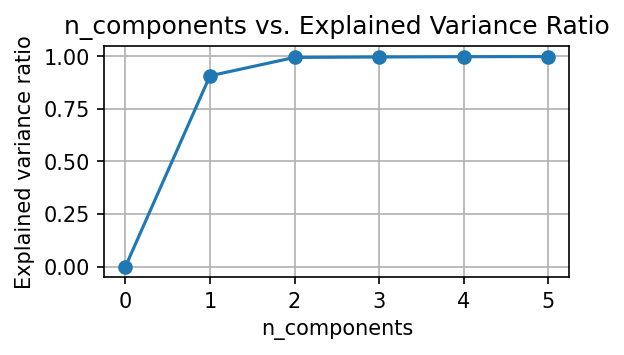

In [21]:
nums = np.arange(6)
var_ratio = []
for num in nums:
    pca = PCA(n_components=num)
    pca.fit(chi)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

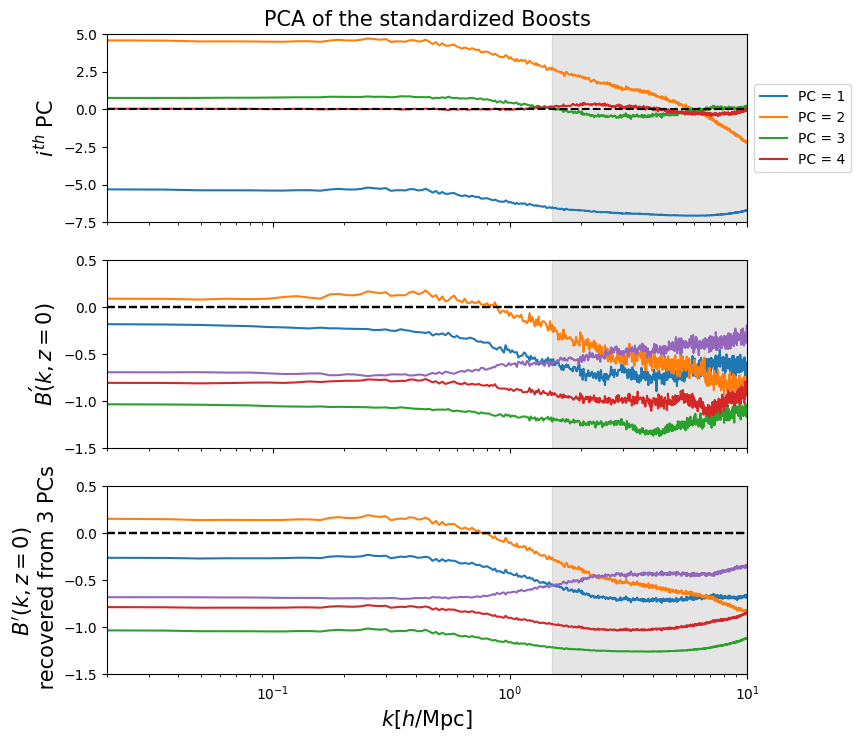

In [67]:
"""Plot PCA components as a function of k"""

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=False,figsize=(8, 8))

for i in range(4):
    ax1.plot(k_arr, np.matmul(np.diag(s), Usvd[:50])[i], label="PC = %d"%int(i+1))
    #ax1.plot(k_arr, np.array(Usklearn[i])[0], color = "r", linestyle="--")
    
ax1.plot(k_arr, np.zeros(len(k_arr)), "k--")
ax1.fill_betweenx([-7.5,5], 1.5, 10, color='gray', alpha=.2)
ax1.set_ylim(-7.5,5)

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax1.set_ylabel(r'$i^{th}$ PC', size = 15)
ax1.set_title("PCA of the standardized Boosts", size = 15)
plt.xscale("log")


for i in range(5):
    ax2.plot(k_arr,chi[i])
    ax2.plot(k_arr, np.zeros(len(k_arr)), "k--")

ax2.set_ylabel(r'$B\'(k,z=0)$', size = 15)
ax2.fill_betweenx([-1.5,0.5], 1.5, 10, color='gray', alpha=.2)
ax2.set_ylim(-1.5,0.5)

for i in range(5):
    ax3.plot(k_arr, np.zeros(len(k_arr)), "k--")
    ax3.plot(k_arr, np.matmul(w_theta, Usvd[:3])[i])

ax3.set_ylabel('$B\'(k,z=0)$ \n recovered from 3 PCs', size = 15)
ax3.set_xlabel(r'$k [h/\text{Mpc}]$', size = 15)

ax3.set_xlim(2e-2,1e1)

ax3.fill_betweenx([-1.5,0.5], 1.5, 10, color='gray', alpha=.2)
ax3.set_ylim(-1.5,0.5)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.2)

ax1.set_xscale("log")


#plt.savefig('PCcompare.pdf' , bbox_inches='tight')
plt.show()


In [29]:
# Find the projections we want to emulate

w_theta = np.matmul(chi, Usvd[:3].T)
print(w_theta.shape)

(50, 3)


/home/c2042999/.local/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


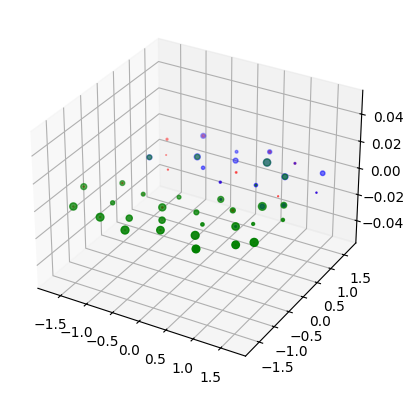

In [30]:
# Plot the projections
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

plt.scatter(theta[0], theta[1], w_theta.T[2], marker="o", color="r")
plt.scatter(theta[0], theta[1], w_theta.T[1], marker="o", color="b")
plt.scatter(theta[0], theta[1], w_theta.T[0], marker="o", color="g")

/tmp/ipykernel_29288/1573148505.py:2: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = scipy.interpolate.interp2d(theta[0], theta[1], w_theta.T[2])
/home/c2042999/.local/lib/python3.10/site-packages/scipy/interpolate/_fitpack_impl.py:593: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,10 m=50 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0

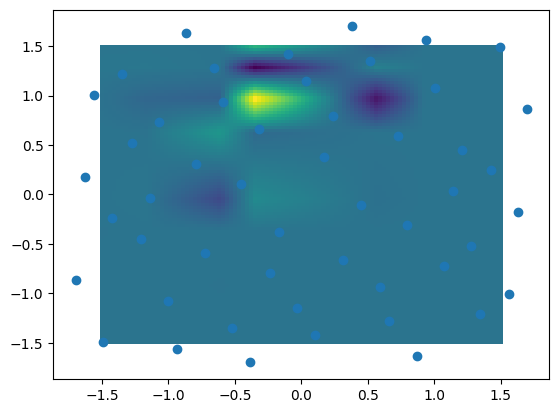

In [31]:
# Plot the projections
f = scipy.interpolate.interp2d(theta[0], theta[1], w_theta.T[2])

x,y = np.meshgrid(np.linspace(-1.5,1.5,100), np.linspace(-1.5,1.5,100))

plt.pcolormesh(x,y , f(np.linspace(-1.5,1.5,100),np.linspace(-1.5,1.5,100)))

plt.scatter(theta[0], theta[1])

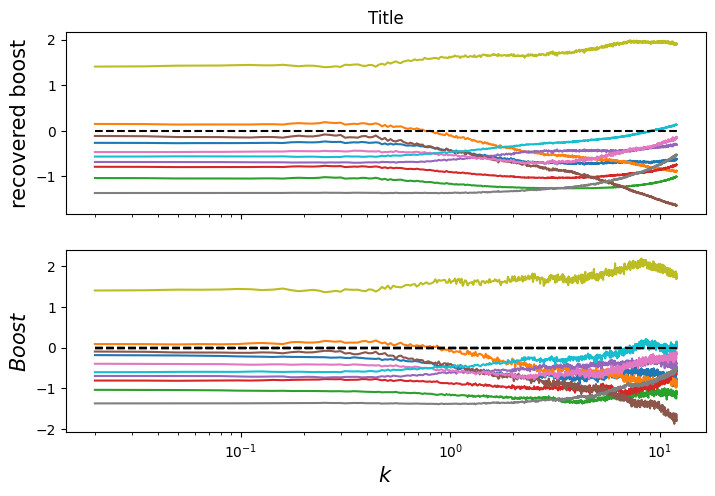

In [33]:
"""Recover boosts from PCA components"""

f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False,figsize=(8, 5))

for i in range(10):
    ax1.plot(k_arr, np.matmul(w_theta, Usvd[:3])[i])
    
ax1.plot(k_arr, np.zeros(len(k_arr)), "k--")


ax1.set_ylabel(r'recovered boost', size = 15)
ax1.set_title("Title")
plt.xscale("log")


for i in range(10):
    ax2.plot(k_arr,chi[i])
    ax2.plot(k_arr, np.zeros(len(k_arr)), "k--")
    

ax2.set_ylabel(r'$Boost$', size = 15)
ax2.set_xlabel(r'$k$', size = 15)


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.2)


plt.show()


## Gaussian processes

In [34]:
# Define the Squared Exponential (SE) covariance function

def SE_kernel(xa, xb, standard_dev, lengthscale):
    
    """Exponentiated quadratic
    xa --> (ma, n), where ma is the number of gaussian vectors (n points in function)
                    and n is the dimension of the vector theta
    xb --> (mb, n)
    standard_dev --> standard deviation of function
    lengthscale --> characteristic length scale"""
    
    # Squared of Euclidian distance [Dist_{a,b} = xa - xb]
    
    sq_norm = -0.5 * (scipy.spatial.distance.cdist(xa/lengthscale, xb/lengthscale, 'euclidean') **2)
    return standard_dev**2 * np.exp(sq_norm)

In [35]:
# Gaussian process posterior
def GP(X1, y1, X2, kernel_func):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the observations (y1, X1), 
    and the prior kernel function.
    """
    # Kernel of the observations
    K11 = kernel_func(X1, X1)
    # Kernel of observations vs to-predict
    K12 = kernel_func(X1, X2)
    # Solve - returns (K11^-1 * K12)^T, assuming positive definite solutions
    solved = scipy.linalg.solve(K11, K12, assume_a='pos').T
    # Compute posterior mean
    mean2 = solved @ y1
    # Compute the posterior covariance
    K22 = kernel_func(X2, X2)
    K2 = K22 - (solved @ K12)
    return mean2, K2  # mean, covariance

In [36]:
# Gaussian process posterior with noisy obeservations
def GP_noise(X1, y1, X2, kernel_func, sigma_noise):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the noisy observations 
    (y1, X1), and the prior kernel function.
    """
    # Kernel of the noisy observations
    K11 = kernel_func(X1, X1) + ((sigma_noise ** 2) * np.eye(len(X1)))
    # Kernel of observations vs to-predict
    K12 = kernel_func(X1, X2)
    # Solve
    solved = scipy.linalg.solve(K11, K12, assume_a='pos').T
    # Compute posterior mean
    mean2 = solved @ y1
    # Compute the posterior covariance
    K22 = kernel_func(X2, X2)
    K2 = K22 - (solved @ K12)
    return mean2, K2  # mean, covariance

## MCMC for hyperparameters

In [37]:
# Find likelihood for given sigma, ell, eta given theta, w_theta from simulations

def log_likelihood(theta, w_theta, params):

    sigma, ell = params
    
    n1 = len(theta[0])  # Number of points to condition on (training points)
    kernel_func_1 = lambda x, y: SE_kernel(x, y, sigma, ell)
    kernel_func_2 = lambda x, y: SE_kernel(x, y, sigma, ell)
    kernel_func_3 = lambda x, y: SE_kernel(x, y, sigma, ell)
    # Sample observations (X1, y1) on the function
    X1 = theta.T

    y_1 = w_theta.T[0].reshape(-1, 1)
    y_2 = w_theta.T[1].reshape(-1, 1)
    y_3 = w_theta.T[2].reshape(-1, 1)


    # Draw samples from the prior at our data points
    # Assume mean of 0 for prior
    covariance_1 = kernel_func_1(X1, X1)
    inv_cov1 = np.linalg.inv(covariance_1)
    covariance_2 = kernel_func_2(X1, X1)
    inv_cov2 = np.linalg.inv(covariance_2)
    covariance_3 = kernel_func_3(X1, X1)
    inv_cov3 = np.linalg.inv(covariance_3)

    lik_1 = -0.5*np.dot(np.dot(y_1.T, inv_cov1), y_1) -0.5*np.log10(np.linalg.det(covariance_1))
    lik_2 = -0.5*np.dot(np.dot(y_2.T, inv_cov2), y_2) -0.5*np.log10(np.linalg.det(covariance_2))
    lik_3 = -0.5*np.dot(np.dot(y_3.T, inv_cov3), y_3) -0.5*np.log10(np.linalg.det(covariance_3))

    return (lik_1 + lik_2 + lik_3)[0][0]


In [38]:
print(log_likelihood(theta, w_theta, [4,0.2]))

-1238.2814183572693


In [39]:
def log_prior(params):
    sigma,ell= params
    if -0.01 < sigma < 100 and -0.01 < ell < 10:
        return 0.0
    return -np.inf

In [40]:
def log_probability(params, theta, w_theta):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, w_theta, params)

In [41]:
#MCMC method

# Choose the "true" parameters.
sigma_est = 3.0
ell1_est = 0.5
ell2_est = 0.5
ell3_est = 0.5

# initializing the walkers in a tiny Gaussian ball
#and then run 10,000 steps of MCMC
pos = [sigma_est , ell1_est] + 1e-2 * np.random.randn(50, 2)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(theta, w_theta)
)
sampler.run_mcmc(pos, 10000, progress=True);

100%|█████████████████████████████████████| 10000/10000 [06:18<00:00, 26.40it/s]


(30000, 2)


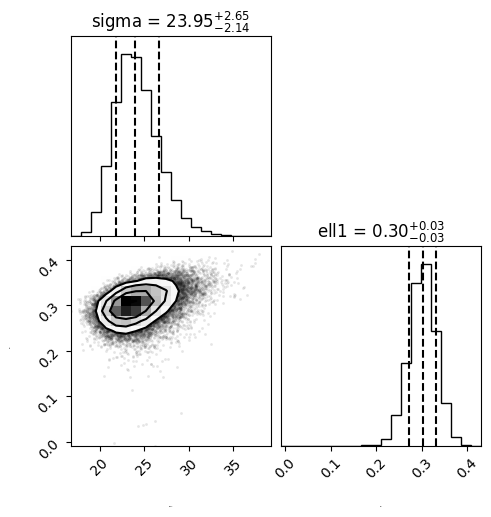

In [52]:
flat_samples = sampler.get_chain(discard=1000, thin=15, flat=True)
labels = [ "sigma", "ell1"]
print(flat_samples.shape)

fig = corner.corner(
    flat_samples, labels=labels, show_titles=True, quantiles=[0.16, 0.50, 0.84],
                    label_kwargs={'labelpad':20, 'fontsize':0}, fontsize=8
);


50
10000
2
10000


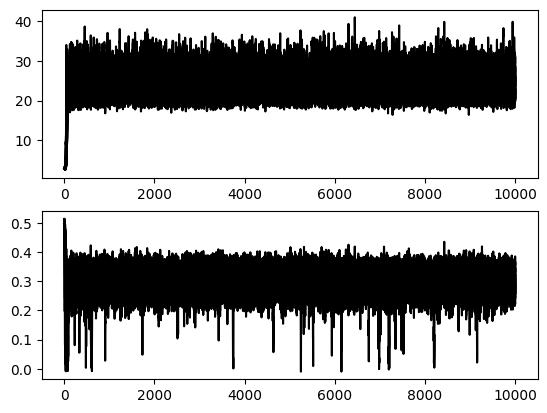

In [53]:
samples_chain = sampler.chain
print(len(samples_chain))
print(len(samples_chain[0]))
print(len(samples_chain[0][0]))
print(len(samples_chain[0, :, 0]))

fig, ax = plt.subplots(2)

for i in range(len(samples_chain)):
    for j in range(len(samples_chain[i, :][0])):
        ax[j].plot(samples_chain[i, :, j], color = "black")


In [54]:
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display((txt))

sigma = np.percentile(flat_samples[:, 0], [16, 50, 84])[0]
ell = np.percentile(flat_samples[:, 1], [16, 50, 84])[0]
#ell_2 = np.percentile(flat_samples[:, 2], [16, 50, 84])[0]
#ell_3 = np.percentile(flat_samples[:, 3], [16, 50, 84])[0]


'\\mathrm{sigma} = 23.947_{-2.144}^{2.654}'

'\\mathrm{ell1} = 0.302_{-0.030}^{0.029}'

In [55]:
# Compute the posterior mean and covariance

n1 = len(theta[0])  # Number of points to condition on (training points)
n2 = 60  # Number of points in posterior (test points)
ny = 5  # Number of functions that will be sampled from the posterior


# Sample observations (X1, y1) on the function
X1 = theta.T

y1 = w_theta.T[0].reshape(-1, 1)
y1_2 = w_theta.T[1].reshape(-1, 1)
y1_3 = w_theta.T[2].reshape(-1, 1)

# Predict points at uniform spacing to capture function
X2 = np.array(np.meshgrid(np.linspace(-2,2,n2),np.linspace(-2,2,n2))).reshape(2,n2*n2).T

# Compute posterior mean and covariance
mean2, variance2 = GP(X1, y1, X2, lambda x, y: SE_kernel(x, y, sigma, ell))
mean2_2, variance2_2 = GP(X1, y1_2, X2, lambda x, y: SE_kernel(x, y, sigma, ell))
mean2_3, variance2_3 = GP(X1, y1_3, X2, lambda x, y: SE_kernel(x, y, sigma, ell))

# Compute the standard deviation at the test points to be plotted
stand_dev2 = np.sqrt(np.diag(variance2))

# Draw some samples of the posterior
y2 = np.random.multivariate_normal(mean=mean2.T[0], cov=variance2, size=ny)

Text(0.5, 0, 'x_0')

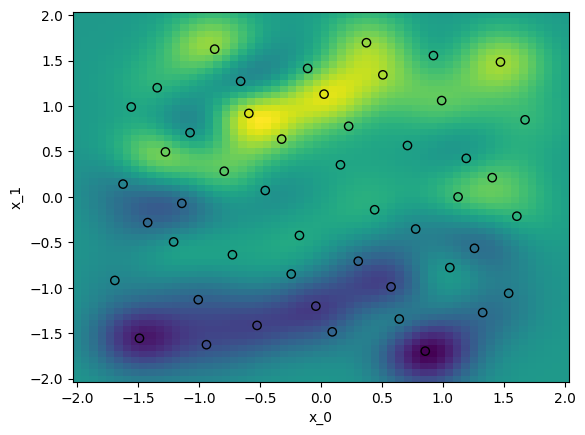

In [59]:
x,y = np.meshgrid(np.linspace(-2,2,n2),np.linspace(-2,2,n2))

cmap = matplotlib.colormaps['viridis']
max_val = max(np.max(mean2.reshape(n2,n2)), np.max(y1))
min_val = min(np.min(mean2.reshape(n2,n2)), np.min(y1))

frac = (y1 - min_val)/(max_val-min_val)

plt.pcolormesh(x,y , mean2.reshape(n2,n2), cmap='viridis', 
               vmax = max_val,vmin = min_val)

plt.scatter(theta[0], theta[1],c = cmap(frac) , edgecolor="k")

#plt.fill_between(X.flatten(), -sigma, sigma, alpha=0.2)

plt.ylabel("x_1")
plt.xlabel("x_0")

In [60]:
## Recover PCAs

w_theta_emu = np.append(np.append(mean2, mean2_2, axis=1),mean2_3, axis=1).T
theta_emu = np.array(np.meshgrid(np.linspace(-2,2,n2),np.linspace(-2,2,n2))).reshape(2,n2**2)
f_w_theta1 = scipy.interpolate.interp2d(theta_emu[0], theta_emu[1], w_theta_emu[0])
f_w_theta2 = scipy.interpolate.interp2d(theta_emu[0], theta_emu[1], w_theta_emu[1])
f_w_theta3 = scipy.interpolate.interp2d(theta_emu[0], theta_emu[1], w_theta_emu[2])

print(w_theta_emu.shape)
print(theta_emu.shape)

/tmp/ipykernel_453224/2371735077.py:5: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f_w_theta1 = scipy.interpolate.interp2d(theta_emu[0], theta_emu[1], w_theta_emu[0])
/tmp/ipykernel_453224/2371735077.py:6: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use 

(3, 3600)
(2, 3600)


/tmp/ipykernel_453224/2524178720.py:8: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new code, for regular grids use `RegularGridInterpolator` instead.
        For scattered data, prefer `LinearNDInterpolator` or
        `CloughTocher2DInterpolator`.

        For more details see
        `https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  w_theta_emu_arr[0][i] = f_w_theta1(theta[0][i], theta[1][i])
/tmp/ipykernel_453224/2524178720.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w_theta_emu_arr[0][i] = f_w_the

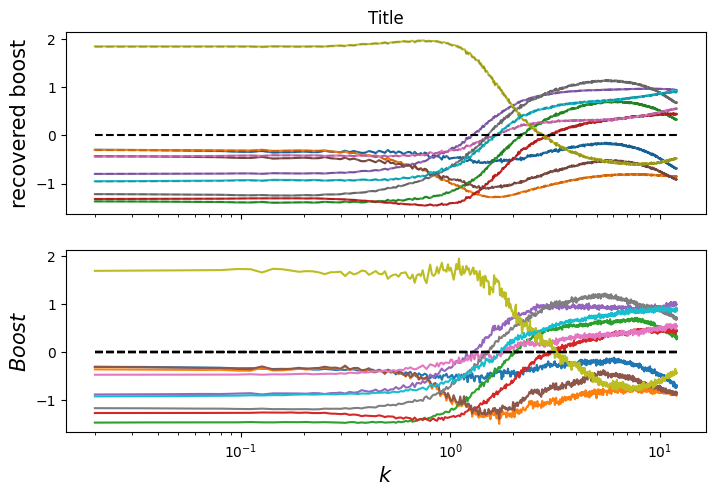

In [61]:
"""Recover boosts from PCA components"""

f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False,figsize=(8, 5))

w_theta_emu_arr = np.zeros((3, len(theta[0])))

for i in range(len(theta[0])):
    w_theta_emu_arr[0][i] = f_w_theta1(theta[0][i], theta[1][i])
    w_theta_emu_arr[1][i] = f_w_theta2(theta[0][i], theta[1][i])
    w_theta_emu_arr[2][i] = f_w_theta3(theta[0][i], theta[1][i])
    
    
for i in range(10):
    ax1.plot(k_arr, np.matmul(w_theta_emu_arr.T, Usvd[:3])[i])
    ax1.plot(k_arr, np.matmul(w_theta, Usvd[:3])[i], "k--", alpha=0.2)
    
ax1.plot(k_arr, np.zeros(len(k_arr)), "k--")


ax1.set_ylabel(r'recovered boost', size = 15)
ax1.set_title("Title")
plt.xscale("log")


for i in range(10):
    ax2.plot(k_arr,chi[i])
    ax2.plot(k_arr, np.zeros(len(k_arr)), "k--")
    

ax2.set_ylabel(r'$Boost$', size = 15)
ax2.set_xlabel(r'$k$', size = 15)


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.2)


plt.show()


In [62]:
theta_emu = np.zeros((len(theta_1), len(theta_1[0])))
chi_emu = np.zeros(len(chi))

for i in range(len(theta)):
    theta_emu[i] = (theta[i]*np.std(theta_1[i]) + np.mean(theta_1[i]))

print(theta.shape)

# function of k, for now only z = 0
chi_emu = (np.matmul(w_theta_emu_arr.T, Usvd[:3])*np.std(Bk_arr[:, 0, :], axis=0) + np.mean(Bk_arr[:, 0, :], axis=0))


(2, 49)


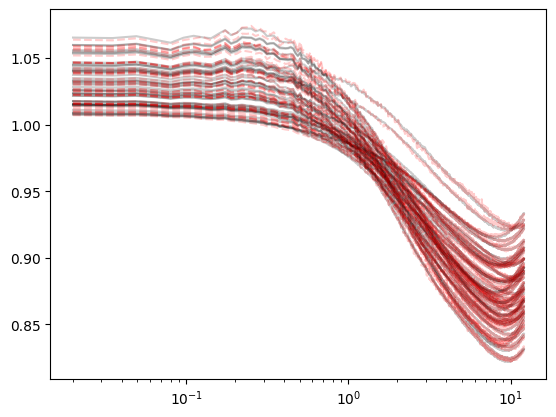

In [63]:
for sim_index in range(49):
    plt.plot(k_arr, chi_emu[sim_index], 'k', alpha=0.2)
    plt.plot(k_arr, Bk_arr[sim_index, 0, :], 'r--', alpha=0.2)

plt.xscale("log")